### 1. Imports

In [1]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")
import gym
import numpy as np
from stable_baselines3 import PPO
from matplotlib import pyplot as plt

In [2]:
# Import classes
from rl_environment import Environment

### 2. Environment creation

#### Parameters for Simulation

In [3]:
number_of_regional_warehouses = 3
max_inventory_amount_regional_warehouses = 30
max_inventory_amount_central_warehouse = 60
customer_demand_per_step = [1,2,1,3]  # List needs one entry per regional warehouse 
simulation_length = 30
lead_time = 2
shipment_amount = 8
with_manufacturer = True
cw_shipment_amount = 10
manufacturer_prod_capacity_per_step = 10

#### Parameters for Agent Training

In [4]:
training_steps = 150000

print("-> Equals to " + str(int(training_steps/simulation_length)) + " simulation training rounds")

-> Equals to 5000 simulation training rounds


#### Creating Environment

In [5]:
env = Environment(number_of_regional_wh = number_of_regional_warehouses, 
                  rw_inventory_limit = max_inventory_amount_regional_warehouses, 
                  cw_inventory_limit = max_inventory_amount_central_warehouse,
                  demand = customer_demand_per_step,
                  sim_length = simulation_length,
                  lead_time = lead_time,
                  shipment_amount = shipment_amount,
                  manufacturer = with_manufacturer,
                  cw_shipment_amount = cw_shipment_amount,
                  mf_prod_capacity = manufacturer_prod_capacity_per_step
                 )

env.print_environment_information()

Simulation created with the following parameters:
________________________________________________________________________________
Simulation | Round 1
-------------------
-> Active shipments:
No active shipments

-> Warehouses:
central_warehouse ; Inventory: 20
regional_warehouse_1 ; ID: 1 ; Inventory: 10 ; Demand: 1 ; Lost sales: 0
regional_warehouse_2 ; ID: 2 ; Inventory: 10 ; Demand: 2 ; Lost sales: 0
regional_warehouse_3 ; ID: 3 ; Inventory: 10 ; Demand: 1 ; Lost sales: 0

-> Production plant:
manufacturer ; Production per step: 10 ; Inventory: 100
________________________________________________________________________________
Environment Information
-----------------------
Observation space: Dict(cw_inventory:Discrete(61), rw_inventories:MultiDiscrete([31 31 31]), shipments:MultiDiscrete([2 2 2]))
Action space: MultiDiscrete([2 2 2 2])
Starting state: {'rw_inventories': array([10, 10, 10]), 'shipments': array([0, 0, 0]), 'cw_inventory': 20}
______________________________________

### 3. RL model training

###### Model 1: PPO
Proximal Policy Optimization
https://openai.com/blog/openai-baselines-ppo/

In [6]:
ppo_model = PPO("MultiInputPolicy", env, verbose=1)
ppo_model.learn(total_timesteps=training_steps)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30       |
|    ep_rew_mean     | 2.72     |
| time/              |          |
|    fps             | 627      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 3.27         |
| time/                   |              |
|    fps                  | 498          |
|    iterations           | 2            |
|    time_elapsed         | 8            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0119105615 |
|    clip_fraction        | 0.119        |
|    clip_range           | 0.2          |
|    en

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 4.52        |
| time/                   |             |
|    fps                  | 431         |
|    iterations           | 11          |
|    time_elapsed         | 52          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.016254626 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.48       |
|    explained_variance   | 0.536       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.308       |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0327     |
|    value_loss           | 0.707       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 5.15        |
| time/                   |             |
|    fps                  | 415         |
|    iterations           | 21          |
|    time_elapsed         | 103         |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.018333524 |
|    clip_fraction        | 0.185       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.98       |
|    explained_variance   | 0.564       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.315       |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.0335     |
|    value_loss           | 0.881       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 6.87        |
| time/                   |             |
|    fps                  | 421         |
|    iterations           | 31          |
|    time_elapsed         | 150         |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.013389859 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.43       |
|    explained_variance   | 0.762       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.174       |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.0226     |
|    value_loss           | 0.745       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 8.25        |
| time/                   |             |
|    fps                  | 413         |
|    iterations           | 41          |
|    time_elapsed         | 202         |
|    total_timesteps      | 83968       |
| train/                  |             |
|    approx_kl            | 0.017075019 |
|    clip_fraction        | 0.135       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | 0.949       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.135       |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.0179     |
|    value_loss           | 0.203       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 8.91        |
| time/                   |             |
|    fps                  | 409         |
|    iterations           | 51          |
|    time_elapsed         | 254         |
|    total_timesteps      | 104448      |
| train/                  |             |
|    approx_kl            | 0.021779852 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.797      |
|    explained_variance   | 0.972       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0272      |
|    n_updates            | 500         |
|    policy_gradient_loss | -0.0193     |
|    value_loss           | 0.125       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 9.04        |
| time/                   |             |
|    fps                  | 406         |
|    iterations           | 61          |
|    time_elapsed         | 307         |
|    total_timesteps      | 124928      |
| train/                  |             |
|    approx_kl            | 0.013874604 |
|    clip_fraction        | 0.136       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.693      |
|    explained_variance   | 0.959       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0171      |
|    n_updates            | 600         |
|    policy_gradient_loss | -0.00759    |
|    value_loss           | 0.212       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 9.01        |
| time/                   |             |
|    fps                  | 402         |
|    iterations           | 71          |
|    time_elapsed         | 361         |
|    total_timesteps      | 145408      |
| train/                  |             |
|    approx_kl            | 0.010624766 |
|    clip_fraction        | 0.0989      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.773      |
|    explained_variance   | 0.976       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0742      |
|    n_updates            | 700         |
|    policy_gradient_loss | -0.00367    |
|    value_loss           | 0.125       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

###### Learning Curve

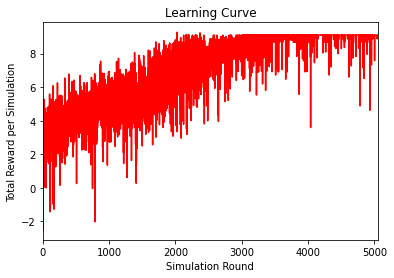

In [7]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(env.total_reward, color="red")
plt.title("Learning Curve")
plt.xlim(0, len(env.total_reward))
plt.ylabel("Total Reward per Simulation")
plt.xlabel("Simulation Round")
plt.show()

### 4. Run simulation

In [8]:
# Reset environment for simulation
state = env.reset()
done = False

# Graph data
inventory_levels = {}
for rw_id in env.simulation.get_regional_warehouses():
    inventory_levels[rw_id] = []
    
cw_inventory_level = []

# Run simulation with model
while not done:
    action, _states = ppo_model.predict(state)
    state, reward, done, info = env.step(action)
    
    # For Graph
    i = 1
    for inv in info["RW Invs:"]:
        inventory_levels[i].append(inv)
        i += 1
    try:
        cw_inventory_level.append(info["CW Inv:"])
    except:
        pass
    
    # print(env.simulation.print_state())
    for i in info:
        print(i, info[i], end=" | ")
    print()
    
print("\n", env.evaluation_parameters())

Steps left: 29 | RW Invs: [9, 8, 9] | Shipments [0, 1, 1] | Action: [0 1 1 0] | Reward: 0.13 | CW Inv: 4 | Manufacturer: 110 | 
Steps left: 28 | RW Invs: [8, 6, 8] | Shipments [0, 1, 1] | Action: [0 1 0 0] | Reward: 0.14 | CW Inv: 4 | Manufacturer: 120 | 
Steps left: 27 | RW Invs: [7, 12, 15] | Shipments [0, 0, 0] | Action: [0 1 1 0] | Reward: 0.12 | CW Inv: 4 | Manufacturer: 130 | 
Steps left: 26 | RW Invs: [6, 10, 14] | Shipments [0, 0, 0] | Action: [0 0 1 0] | Reward: 0.13 | CW Inv: 4 | Manufacturer: 140 | 
Steps left: 25 | RW Invs: [5, 8, 13] | Shipments [0, 0, 0] | Action: [0 1 0 0] | Reward: 0.14 | CW Inv: 4 | Manufacturer: 150 | 
Steps left: 24 | RW Invs: [4, 6, 12] | Shipments [0, 0, 0] | Action: [0 1 1 1] | Reward: 0.15 | CW Inv: 4 | Manufacturer: 100 | 
Steps left: 23 | RW Invs: [3, 4, 11] | Shipments [0, 0, 0] | Action: [0 1 0 1] | Reward: 0.18 | CW Inv: 4 | Manufacturer: 100 | 
Steps left: 22 | RW Invs: [2, 2, 10] | Shipments [0, 1, 0] | Action: [0 1 1 0] | Reward: 0.23 | C

###### Inventory level graphs

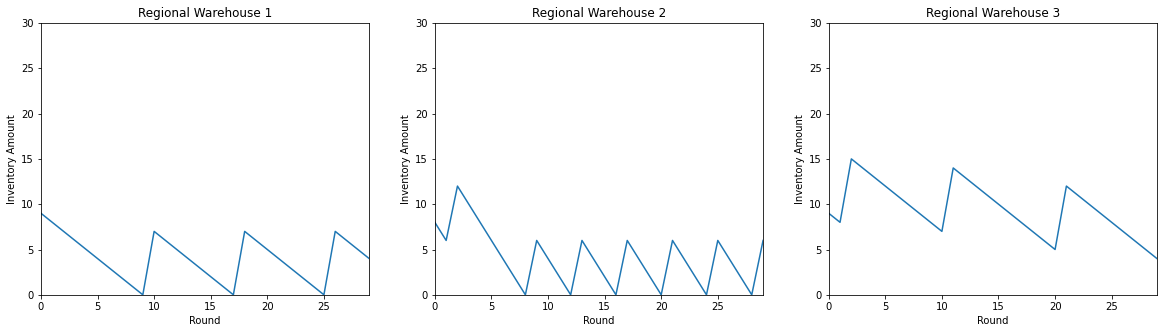

In [9]:
# Plot inventories of regional warehouses

plt.rcParams["figure.figsize"] = (20, 5)

for rw_id in inventory_levels:
    plt.subplot(1, number_of_regional_warehouses, rw_id)
    plt.plot(inventory_levels[rw_id])
    plt.title("Regional Warehouse " + str(rw_id))
    plt.ylim(0, max_inventory_amount_regional_warehouses)
    plt.xlim(0, simulation_length-1)
    plt.ylabel("Inventory Amount")
    plt.xlabel("Round")

plt.show()

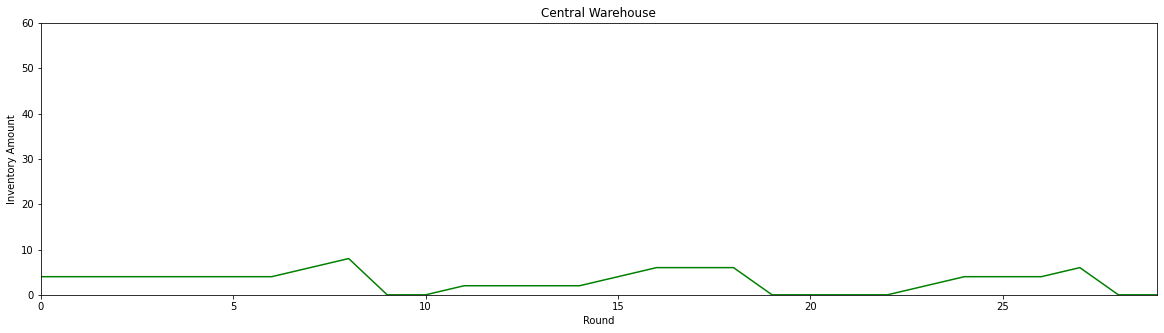

In [10]:
# Plot central warehouse inventory (Only display if simulated by adding a manufacturer)
if len(cw_inventory_level) != 0:
    plt.rcParams["figure.figsize"] = (20, 5)
    plt.plot(cw_inventory_level, color="green")
    plt.title("Central Warehouse")
    plt.ylim(0, max_inventory_amount_central_warehouse)
    plt.xlim(0, simulation_length-1)
    plt.ylabel("Inventory Amount")
    plt.xlabel("Round")
    plt.show()